### Paso 1: Importar las librerías

In [1]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Paso 2: Leer datos 

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 515 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import yfinance as yf

# berkshire hathaway inc. (b stock)
#brk = yf.Ticker('BRK-B')

brk = yf.Ticker('MSFT') 

df = brk.history(period="max", auto_adjust=True)

df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055654,0.063838,0.055654,0.061109,1031788800,0.0,0.0
1986-03-14,0.061109,0.064384,0.061109,0.063292,308160000,0.0,0.0
1986-03-17,0.063292,0.064929,0.063292,0.064384,133171200,0.0,0.0
1986-03-18,0.064383,0.064929,0.062201,0.062746,67766400,0.0,0.0
1986-03-19,0.062746,0.063292,0.061109,0.061655,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2022-08-09,279.640015,283.079987,277.609985,282.299988,23405200,0.0,0.0
2022-08-10,288.170013,289.809998,286.940002,289.160004,24687800,0.0,0.0
2022-08-11,290.850006,291.209991,286.510010,287.019989,20065900,0.0,0.0


In [4]:
#eliminamos las variables sin valores
df = df.drop(['Dividends'], axis='columns')
df = df.drop(['Stock Splits'], axis='columns')
df

,Open,High,Low,Close,Volume
Date,,,,,
1986-03-13,0.055654,0.063838,0.055654,0.061109,1031788800
1986-03-14,0.061109,0.064384,0.061109,0.063292,308160000
1986-03-17,0.063292,0.064929,0.063292,0.064384,133171200
1986-03-18,0.064383,0.064929,0.062201,0.062746,67766400
1986-03-19,0.062746,0.063292,0.061109,0.061655,47894400
...,...,...,...,...,...
2022-08-09,279.640015,283.079987,277.609985,282.299988,23405200
2022-08-10,288.170013,289.809998,286.940002,289.160004,24687800
2022-08-11,290.850006,291.209991,286.510010,287.019989,20065900


**Variables adicionales:**
* RSI (Indicador de fuerza relativa): utilizado en análisis técnico para predecir tendencias en los precios y saber si un  activo se encuentra sobrecomprado o sobrevendido.
* MACD: recoge información de diferentes medias móviles y, así, ayuda a identificar posibles oportunidades de inversión cercanas a los niveles de soporte y resistencia.

In [5]:
delta = df['Close'].diff()
up = delta.clip(lower = 0)
down = -1*delta.clip(upper=0)

ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()

rs = ema_up/ema_down
df['RSI'] = 100 - (100/(1+rs))
df

,Open,High,Low,Close,Volume,RSI
Date,,,,,,
1986-03-13,0.055654,0.063838,0.055654,0.061109,1031788800,NaN
1986-03-14,0.061109,0.064384,0.061109,0.063292,308160000,100.000000
1986-03-17,0.063292,0.064929,0.063292,0.064384,133171200,100.000000
1986-03-18,0.064383,0.064929,0.062201,0.062746,67766400,94.352875
1986-03-19,0.062746,0.063292,0.061109,0.061655,47894400,90.677897
...,...,...,...,...,...,...
2022-08-09,279.640015,283.079987,277.609985,282.299988,23405200,61.444464
2022-08-10,288.170013,289.809998,286.940002,289.160004,24687800,65.845199
2022-08-11,290.850006,291.209991,286.510010,287.019989,20065900,63.413572


In [6]:
%matplotlib notebook

In [7]:
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp1 -exp2
df['Signal line'] = df['MACD'].ewm(span=9, adjust=False).mean()

In [8]:
df.head()

,Open,High,Low,Close,Volume,RSI,MACD,Signal line
Date,,,,,,,,
1986-03-13,0.055654,0.063838,0.055654,0.061109,1031788800,NaN,0.000000,0.000000
1986-03-14,0.061109,0.064384,0.061109,0.063292,308160000,100.000000,0.000174,0.000035
1986-03-17,0.063292,0.064929,0.063292,0.064384,133171200,100.000000,0.000396,0.000107
1986-03-18,0.064383,0.064929,0.062201,0.062746,67766400,94.352875,0.000434,0.000172
1986-03-19,0.062746,0.063292,0.061109,0.061655,47894400,90.677897,0.000372,0.000212


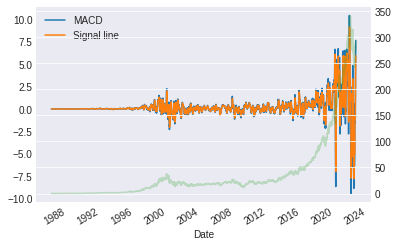

In [22]:
fig, ax = plt.subplots()
df[['MACD', 'Signal line']].plot(ax=ax)
df['Close'].plot(ax=ax, alpha=0.25, secondary_y=True)

In [10]:
#Quitamos las filas que tengan el valor de NaN
df=df.dropna()
df

,Open,High,Low,Close,Volume,RSI,MACD,Signal line
Date,,,,,,,,
1986-03-14,0.061109,0.064384,0.061109,0.063292,308160000,100.000000,0.000174,0.000035
1986-03-17,0.063292,0.064929,0.063292,0.064384,133171200,100.000000,0.000396,0.000107
1986-03-18,0.064383,0.064929,0.062201,0.062746,67766400,94.352875,0.000434,0.000172
1986-03-19,0.062746,0.063292,0.061109,0.061655,47894400,90.677897,0.000372,0.000212
1986-03-20,0.061655,0.061655,0.059473,0.060018,58435200,85.310534,0.000189,0.000208
...,...,...,...,...,...,...,...,...
2022-08-09,279.640015,283.079987,277.609985,282.299988,23405200,61.444464,5.907180,4.228814
2022-08-10,288.170013,289.809998,286.940002,289.160004,24687800,65.845199,6.498959,4.682843
2022-08-11,290.850006,291.209991,286.510010,287.019989,20065900,63.413572,6.717829,5.089840


### Paso 3: Definir las variables Explicativas

In [11]:
# Crear variables predictoras
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Almacenar todas las variables predictoras en una variable X
X = df[['Open-Close', 'High-Low', 'RSI', 'MACD']]
X

,Open-Close,High-Low,RSI,MACD
Date,,,,
1986-03-14,-0.002182,0.003274,100.000000,0.000174
1986-03-17,-0.001092,0.001637,100.000000,0.000396
1986-03-18,0.001637,0.002729,94.352875,0.000434
1986-03-19,0.001091,0.002182,90.677897,0.000372
1986-03-20,0.001637,0.002182,85.310534,0.000189
...,...,...,...,...
2022-08-09,-2.659973,5.470001,61.444464,5.907180
2022-08-10,-0.989990,2.869995,65.845199,6.498959
2022-08-11,3.830017,4.699982,63.413572,6.717829


### Paso 4: Definir la variable Objetivo

Si el precio de mañana es mayor que el precio de hoy, entonces compramos la acción, de lo contrario no tendremos ninguna posición en ella. 

Almacenamos: 

* 1: Señal de subida próxima del precio (señal de compra) 
* 0: señal de bajada próxima del precio (sseña de venta) 

Utilizaremos la función where() de NumPy para hacer esto

In [12]:
# Variable objetivo
#Comparamos el cierre anterior con el actual
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([1, 0, 0, ..., 1, 1, 0])

### Paso 5: dividir los datos en train y test

Dividimos los datos en conjuntos de datos de entrenamiento y de prueba. Esto se hace para que podamos evaluar la eficacia del modelo en el conjunto de datos de prueba.

In [13]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train dataset
X_train = X[:split]
y_train = y[:split]

# Test dataset
X_test = X[split:]
y_test = y[split:]

### Paso 6: Clasificador de vectores de soporte (SVC)

Usamos la función SVC() de la biblioteca sklearn.svm. SVC para crear nuestro modelo clasificador usando el método fit() en el conjunto de datos de entrenamiento.

In [14]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

### Paso 7: Precisión del clasificador 

Calculamos la precisión del algoritmo en el conjunto de datos de entrenamiento y prueba comparando los valores reales de la señal con los valores predichos de la señal. La función accuracy_score() se utilizará para calcular la precisión.

In [15]:
print('********************************************')
print('Para el conjunto de datos de Entrenamiento: ')
y_pred = cls.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_pred))

print('********************************************')
print('Para el conjunto de datos de Pueba: ')
y_pred = cls.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

********************************************
Para el conjunto de datos de Entrenamiento: 
Train Accuracy:  0.5053104575163399
********************************************
Para el conjunto de datos de Pueba: 
Test Accuracy:  0.46187363834422657


Una precisión mayor del 50% en los datos de prueba sugiere que el modelo clasificador es efectivo.

### Paso 8: Implementación de la estrategia

Predeciremos la señal (compra o venta) usando la función cls.predict().

In [16]:
df['Predicted_Signal'] = cls.predict(X)
df['Predicted_Signal']

Date
1986-03-14    0
1986-03-17    0
1986-03-18    0
1986-03-19    0
1986-03-20    0
             ..
2022-08-09    0
2022-08-10    0
2022-08-11    0
2022-08-12    0
2022-08-15    0
Name: Predicted_Signal, Length: 9180, dtype: int64

Calcular devoluciones diarias 

In [17]:
df['Return'] = df.Close.pct_change()
df['Return']

Date
1986-03-14         NaN
1986-03-17    0.017250
1986-03-18   -0.025432
1986-03-19   -0.017391
1986-03-20   -0.026547
                ...   
2022-08-09    0.007063
2022-08-10    0.024300
2022-08-11   -0.007401
2022-08-12    0.017037
2022-08-15    0.005909
Name: Return, Length: 9180, dtype: float64

Calcular la rentabilidad de la estrategia

In [18]:
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)
df['Strategy_Return'] 

Date
1986-03-14    NaN
1986-03-17    0.0
1986-03-18   -0.0
1986-03-19   -0.0
1986-03-20   -0.0
             ... 
2022-08-09    0.0
2022-08-10    0.0
2022-08-11   -0.0
2022-08-12    0.0
2022-08-15    0.0
Name: Strategy_Return, Length: 9180, dtype: float64

Calcular rendimientos acumulativos

In [19]:
df['Cum_Ret'] = df['Return'].cumsum()
df.head()

,Open,High,Low,Close,Volume,RSI,MACD,Signal line,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,,,
1986-03-14,0.061109,0.064384,0.061109,0.063292,308160000,100.000000,0.000174,0.000035,-0.002182,0.003274,0,NaN,NaN,NaN
1986-03-17,0.063292,0.064929,0.063292,0.064384,133171200,100.000000,0.000396,0.000107,-0.001092,0.001637,0,0.017250,0.0,0.017250
1986-03-18,0.064383,0.064929,0.062201,0.062746,67766400,94.352875,0.000434,0.000172,0.001637,0.002729,0,-0.025432,-0.0,-0.008182
1986-03-19,0.062746,0.063292,0.061109,0.061655,47894400,90.677897,0.000372,0.000212,0.001091,0.002182,0,-0.017391,-0.0,-0.025573
1986-03-20,0.061655,0.061655,0.059473,0.060018,58435200,85.310534,0.000189,0.000208,0.001637,0.002182,0,-0.026547,-0.0,-0.052119


Calcular la rentabilidad acumulada de la estrategia

In [20]:
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df.head()

,Open,High,Low,Close,Volume,RSI,MACD,Signal line,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,,,
1986-03-14,0.061109,0.064384,0.061109,0.063292,308160000,100.000000,0.000174,0.000035,-0.002182,0.003274,0,NaN,NaN,NaN,NaN
1986-03-17,0.063292,0.064929,0.063292,0.064384,133171200,100.000000,0.000396,0.000107,-0.001092,0.001637,0,0.017250,0.0,0.017250,0.0
1986-03-18,0.064383,0.064929,0.062201,0.062746,67766400,94.352875,0.000434,0.000172,0.001637,0.002729,0,-0.025432,-0.0,-0.008182,0.0
1986-03-19,0.062746,0.063292,0.061109,0.061655,47894400,90.677897,0.000372,0.000212,0.001091,0.002182,0,-0.017391,-0.0,-0.025573,0.0
1986-03-20,0.061655,0.061655,0.059473,0.060018,58435200,85.310534,0.000189,0.000208,0.001637,0.002182,0,-0.026547,-0.0,-0.052119,0.0


## Plot Rendimiento de la estrategia vs Rendimiento original

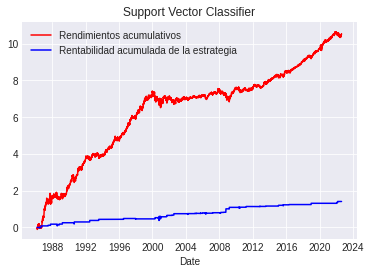

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red', label='Rendimientos acumulativos')
plt.plot(df['Cum_Strategy'],color='blue', label='Rentabilidad acumulada de la estrategia')

plt.xlabel('Date')
plt.title('Support Vector Classifier')
plt.legend()
plt.show()

Nuestra estrategia (línea azul) proporcionó un rendimiento muy poble que el rendimiento origianal (línea roja) ya que Test Accuracy es 46% respecto al 50% recomendado.